### Linear Regression model to predict the test cricket runs of player using WTC 2019-2022 dataset

Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import math

Reading the Data

In [31]:
#import dataset
my_df = pd.read_excel("E:/Programming/Datasets/wtc.xlsx")
my_df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,4s,6s
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,19.140000,33.600000,2.540000,1244.480000,41.172600,2453.5000,50.988600,2.80000,6.180000,2.520000,143.480000,8.880000
std,5.767644,10.794935,1.567658,492.065171,10.756164,873.8495,7.855288,2.08982,3.108185,1.897797,56.514488,9.815939
min,7.000000,13.000000,0.000000,723.000000,25.900000,1297.0000,34.290000,0.00000,1.000000,0.000000,63.000000,0.000000
25%,15.000000,25.500000,1.000000,902.750000,34.230000,1898.2500,46.867500,2.00000,4.000000,1.000000,104.500000,3.250000
50%,19.000000,32.500000,2.000000,1139.500000,38.935000,2249.0000,51.180000,2.00000,6.000000,2.000000,133.000000,5.000000
75%,22.000000,39.000000,3.000000,1426.500000,45.097500,2758.2500,55.902500,3.00000,8.000000,4.000000,170.750000,10.750000
max,39.000000,72.000000,6.000000,3450.000000,67.330000,6039.0000,72.100000,11.00000,13.000000,8.000000,374.000000,55.000000


Preliminary Analysis

In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  50 non-null     object 
 1   Span    50 non-null     object 
 2   Mat     50 non-null     int64  
 3   Inns    50 non-null     int64  
 4   NO      50 non-null     int64  
 5   Runs    50 non-null     int64  
 6   HS      50 non-null     object 
 7   Ave     50 non-null     float64
 8   BF      50 non-null     int64  
 9   SR      50 non-null     float64
 10  100     50 non-null     int64  
 11  50      50 non-null     int64  
 12  0       50 non-null     int64  
 13  4s      50 non-null     int64  
 14  6s      50 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 6.0+ KB


Inference: <br>
Everything except the highscore are in there right datatypes. Here the high score value won't matter because it is not effective in calculating the runs

In [6]:
my_df.isna().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
4s        0
6s        0
dtype: int64

Inference: <br>
There are no null values in the dataset

## PreProcessing the data

In [32]:
columns_to_keep = ["Inns", "BF", "100", "50", "0", "4s", "6s", "NO", "Runs"]

In [33]:
new_df = my_df[columns_to_keep]
corr_df = new_df.corr()
corr_df

,Inns,BF,100,50,0,4s,6s,NO,Runs
Inns,1.000000,0.769986,0.413420,0.606175,0.453657,0.812004,0.235663,0.275923,0.785817
BF,0.769986,1.000000,0.668293,0.734825,0.280836,0.879332,0.097170,0.165803,0.915321
100,0.413420,0.668293,1.000000,0.285282,-0.076157,0.757506,0.347008,0.208061,0.812312
50,0.606175,0.734825,0.285282,1.000000,0.035705,0.672189,0.030154,0.142991,0.694559
0,0.453657,0.280836,-0.076157,0.035705,1.000000,0.198181,-0.238693,-0.020853,0.151219
4s,0.812004,0.879332,0.757506,0.672189,0.198181,1.000000,0.243940,0.182218,0.971589
6s,0.235663,0.097170,0.347008,0.030154,-0.238693,0.243940,1.000000,0.227105,0.282891
NO,0.275923,0.165803,0.208061,0.142991,-0.020853,0.182218,0.227105,1.000000,0.256046
Runs,0.785817,0.915321,0.812312,0.694559,0.151219,0.971589,0.282891,0.256046,1.000000


<AxesSubplot: >

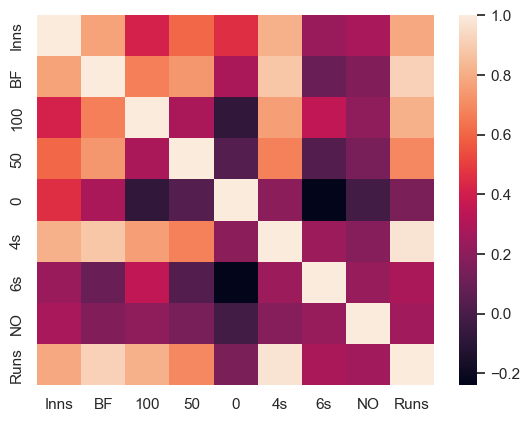

In [9]:
sns.heatmap(corr_df, linecolor = "black")

Inference: <br>
There is no auto correlation in the value of predictors but there is some presence of multicolinearity

Checking for outliers

<AxesSubplot: xlabel='NO'>

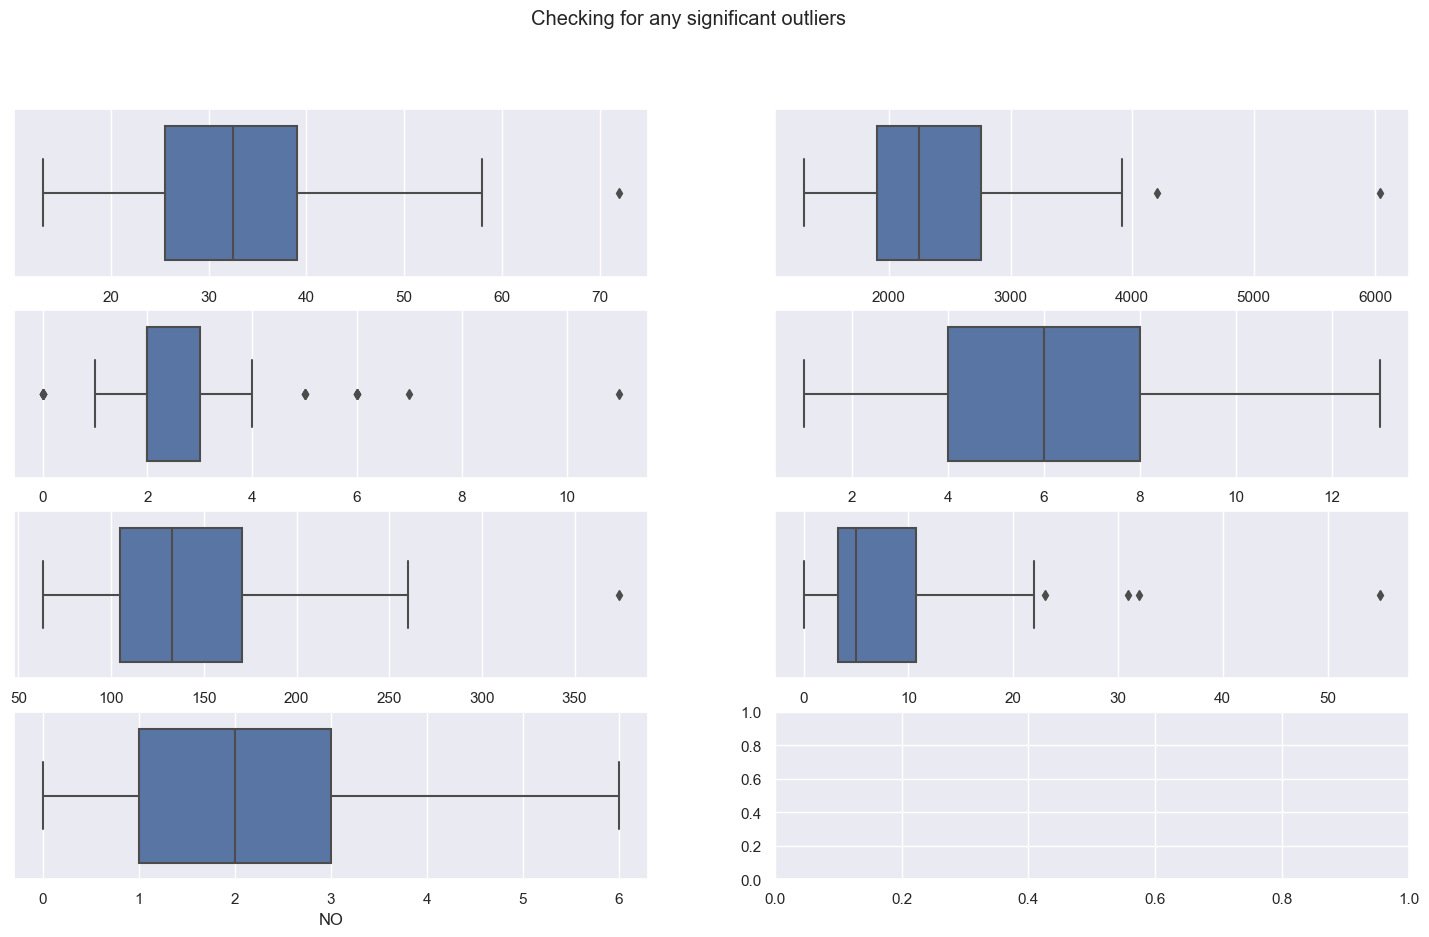

In [34]:
fig, axes = plt.subplots(4, 2, figsize=(18, 10))

fig.suptitle('Checking for any significant outliers')

a = 0
b = 0

#for x in new_df:

    #sns.boxplot(ax = axes[a, b], data = new_df, x = x)

    # += 1

    #if(b == 2):
        #a += 1
        #b = 0


sns.boxplot(ax=axes[0, 0], data = new_df, x ='Inns')
sns.boxplot(ax=axes[0, 1], data= new_df, x = 'BF')
sns.boxplot(ax=axes[1, 0], data = new_df, x = '100')
sns.boxplot(ax=axes[1, 1], data = new_df, x = '50')
sns.boxplot(ax=axes[2, 0], data = new_df, x = '4s')
sns.boxplot(ax=axes[2, 1], data = new_df, x = '6s')
sns.boxplot(ax=axes[3, 0], data = new_df, x = 'NO')

Inference: <br>
Outliers were seen in balls faced and 6s but we cannot take out the outliers as in this context they are dominant to determine the runs scored by a player

Defining Independent and dependent variables

In [37]:
X = new_df[columns_to_keep[:-1]]

Y = my_df.Runs

In [38]:
X.head()

,Inns,BF,100,50,0,4s,6s,NO
0,72,6039,11,13,6,374,8,6
1,40,4206,7,12,2,260,6,1
2,58,3659,6,10,1,231,55,4
3,37,3920,5,12,3,216,9,2
4,33,3438,6,12,0,215,11,4


In [39]:
Y.head()

0    3450
1    2329
2    2132
3    1962
4    1885
Name: Runs, dtype: int64

Checking the scales of the features

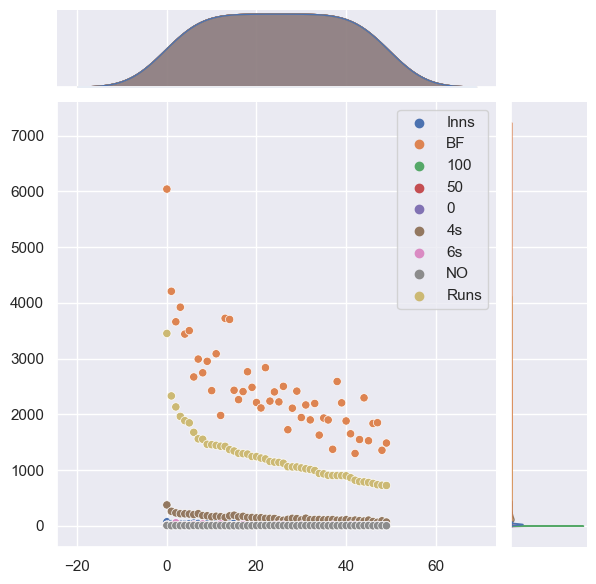

In [40]:
sns.jointplot(new_df)

Inference: We need to standardize the graph

In [41]:
mean_square = []
mean_square_training = []
r2 = []
r2_train = []

In [42]:
def predicting(X, Y):

    for i in range(1, 101):

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1, random_state = i)

        standardizer = StandardScaler()
        standard_x_train = pd.DataFrame(standardizer.fit_transform(X_train), columns = columns_to_keep[:-1])
        standard_X_train = pd.DataFrame(standardizer.fit_transform(X_test), columns = columns_to_keep[:-1])

        regression_model = LinearRegression()

        regression_model.fit(X_train, Y_train)

        y_predicted = regression_model.predict(X_test)
        y_train_prediction = regression_model.predict(X_train)

        mean_square.append(math.sqrt(mean_squared_error(Y_test, y_predicted)))
        mean_square_training.append(math.sqrt(mean_squared_error(Y_train, y_train_prediction)))

        r2.append(r2_score(Y_test, y_predicted))
        r2_train.append(r2_score(Y_train, y_train_prediction))

In [43]:
predicting(X, Y)

In [44]:
min(mean_square)

23.94445820401176

In [45]:
mean_square.index(min(mean_square))

57

In [46]:
r2[57]

0.9967107514200072

Splitting the data 

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1, random_state = 58)

Inference: <br>
The data is Split 

Standardizing the data 

In [48]:
standardizer = StandardScaler()
standard_x_train = pd.DataFrame(standardizer.fit_transform(X_train), columns = columns_to_keep[:-1])
standard_X_train = pd.DataFrame(standardizer.fit_transform(X_test), columns = columns_to_keep[:-1])

In [49]:
regression_model = LinearRegression()

In [50]:
regression_model.fit(X_train, Y_train)

LinearRegression()

In [51]:
y_predicted = regression_model.predict(X_test)
y_train_prediction = regression_model.predict(X_train)

In [52]:
regression_model.score(X_test, Y_test)

0.9967107514200072

In [53]:
mean_square = mean_squared_error(Y_test, y_predicted)
mean_square_training = mean_squared_error(Y_train, y_train_prediction)

r2 = r2_score(Y_test, y_predicted)
r2_train = r2_score(Y_train, y_train_prediction)

In [54]:
print(f"The root mean squared error for the predicted values is: {math.sqrt(mean_square)}")
print(f"The root mean squared error the training model: {math.sqrt(mean_square_training)}")

print()

print("--------------------------------------------------------------------------------------------")

print()

print(f"The R squared value of the model is predicted model is: {r2}")
print(f"The squared value of the training model is: {r2_train}")

The root mean squared error for the predicted values is: 23.94445820401176
The root mean squared error the training model: 61.66657396578051

--------------------------------------------------------------------------------------------

The R squared value of the model is predicted model is: 0.9967107514200072
The squared value of the training model is: 0.9843991580710023
